In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
tabel_data = pd.read_csv("glassdoor_jobs.csv")

# Menentukan komponen apa saja dalam data yang harus dibersihkan

In [4]:
tabel_data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$64K-$106K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
1,Associate Business Intelligence Data Scientist,$64K-$106K (Glassdoor est.),"Blending customer advisory, customer support, ...",3.2,Carousel Industries\n3.2,"Exeter, RI","Exeter, RI",1001 to 5000 employees,1992,Company - Private,IT Services,Information Technology,$500 million to $1 billion (USD),-1
2,"Scientist, Population Genomics",$64K-$106K (Glassdoor est.),WuXi NextCODE is seeking a motivated Scientist...,2.9,Carousel Industries\n3.2,"Cambridge, MA","Cambridge, MA",501 to 1000 employees,2015,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,-1
3,Data Analyst II,$64K-$106K (Glassdoor est.),The Data Analyst II is responsible for data en...,4.2,"Insight Enterprises, Inc.\n4.2","Plano, TX","Tempe, AZ",5001 to 10000 employees,1988,Company - Public,Enterprise Software & Network Solutions,Information Technology,$5 to $10 billion (USD),"CDW, PCM, SHI International"
4,Sensory Scientist,$64K-$106K (Glassdoor est.),A leading food production company in St. Louis...,3.8,NIC Infotek\n3.8,"Saint Louis, MO","Tampa, FL",51 to 200 employees,2004,Company - Public,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1


In [5]:
tabel_data.shape

(1000, 14)

In [6]:
tabel_data['Salary Estimate'].value_counts()

$96K-$156K (Glassdoor est.)     170
$69K-$118K (Glassdoor est.)      32
$57K-$97K (Glassdoor est.)       32
$141K-$225K (Glassdoor est.)     32
$90K-$115K(Employer est.)        32
$58K-$69K (Glassdoor est.)       32
$96K-$101K (Glassdoor est.)      32
$74K-$123K (Glassdoor est.)      32
$109K-$178K (Glassdoor est.)     32
$57K-$98K (Glassdoor est.)       32
$112K-$179K (Glassdoor est.)     32
$94K-$154K (Glassdoor est.)      32
$55K-$91K (Glassdoor est.)       32
$111K-$181K (Glassdoor est.)     32
$97K-$154K (Glassdoor est.)      32
$99K-$110K (Glassdoor est.)      32
$119K-$186K (Glassdoor est.)     32
$56K-$97K (Glassdoor est.)       32
$60K-$100K (Glassdoor est.)      32
$60K-$101K (Glassdoor est.)      32
$108K-$171K (Glassdoor est.)     32
$72K-$122K (Glassdoor est.)      32
$97K-$156K (Glassdoor est.)      32
$115K-$140K (Glassdoor est.)     32
$105K-$166K (Glassdoor est.)     32
$73K-$125K (Glassdoor est.)      32
$64K-$106K (Glassdoor est.)      30
Name: Salary Estimate, dtype

In [7]:
tabel_data['Headquarters'].value_counts()

San Francisco, CA     64
New York, NY          57
Boston, MA            30
Reston, VA            25
-1                    21
                      ..
Lombard, IL            1
Ventura, CA            1
Centennial, CO         1
Dulles, VA             1
Gottingen, Germany     1
Name: Headquarters, Length: 282, dtype: int64

In [8]:
tabel_data['Rating'].value_counts()

 3.6    68
 3.8    67
 4.0    65
 3.9    62
 3.5    61
 3.4    55
 5.0    51
 4.1    50
 4.2    48
-1.0    46
 4.5    46
 3.7    46
 4.3    42
 4.6    36
 3.1    32
 3.2    30
 3.3    29
 4.4    27
 4.7    24
 4.9    18
 2.9    18
 4.8    17
 3.0    17
 2.5     9
 2.3     8
 2.2     8
 2.7     7
 2.6     6
 2.8     4
 2.4     1
 1.5     1
 2.0     1
Name: Rating, dtype: int64

Daftar item yang akan dibersihkan (dihilangkan atau ditambahkan):
    1. Kolom headquarters yang memiliki nilai -1 dihapus
    2. Menghapus "Glassdoor est" dari kolom Salary
    3. Mengkonversi kolom Salary Estimate menjadi integer (menghapus K)
    4. Mengkonversi kolom Salary Estimate menjadi nilai rata-rata Salary
    5. Hapus kolom rating yang memiliki nilai -1
    6. Hapus rating dari kolom Company Name
    7. Menambahkan kolom State
    8. Memeriksa apakah pekerjaan berada di state yang sama dengan kantor utama
    9. Menambahkan kolom umur untuk perusahaan
    10. Menambahkan kolom untuk daftar keahlian yang berbeda (Python, R/RStudio, AWS, Spark, Hadoop, Docker, SQL, Linux, Flask, Django, Tensorflow, Keras, PyTorch, Statistics, Algorithms)
    11. Menambahkan kolom baru untuk jenis pekerjaan Ilmu Data di Amerika Serikat
    12. Menambahkan kolom baru untuk menandakan level senioritas
    13. Panjang deskripsi pekerjaan
    14. Jumlah kompetitor

# Proses Pembersihan

## Menghapus baris dengan Null Headquarters:

In [9]:
tabel_data = tabel_data[tabel_data['Headquarters'] != "-1"]

In [10]:
tabel_data["Headquarters"].value_counts()

San Francisco, CA    64
New York, NY         57
Boston, MA           30
Reston, VA           25
Cambridge, MA        17
                     ..
Sacramento, CA        1
Troy, MI              1
Kent, WA              1
Flower Mound, TX      1
Scottsdale, AZ        1
Name: Headquarters, Length: 281, dtype: int64

In [11]:
tabel_data.shape

(979, 14)

## Membersihkan Kolom Salary

In [12]:
gaji = tabel_data['Salary Estimate'].apply(lambda x:x.split("(")[0])

In [13]:
gaji

0      $64K-$106K 
1      $64K-$106K 
2      $64K-$106K 
3      $64K-$106K 
4      $64K-$106K 
          ...     
995    $96K-$156K 
996    $96K-$156K 
997    $96K-$156K 
998    $96K-$156K 
999    $96K-$156K 
Name: Salary Estimate, Length: 979, dtype: object

In [14]:
remove_k = gaji.apply(lambda x:x.replace("K","").replace("$",""))

In [15]:
remove_k

0      64-106 
1      64-106 
2      64-106 
3      64-106 
4      64-106 
        ...   
995    96-156 
996    96-156 
997    96-156 
998    96-156 
999    96-156 
Name: Salary Estimate, Length: 979, dtype: object

In [16]:
tabel_data["min_salary"] = remove_k.apply(lambda x: int(x.split("-")[0]))

In [17]:
tabel_data["min_salary"]

0      64
1      64
2      64
3      64
4      64
       ..
995    96
996    96
997    96
998    96
999    96
Name: min_salary, Length: 979, dtype: int64

In [18]:
tabel_data["max_salary"] = remove_k.apply(lambda x: int(x.split("-")[1]))

In [19]:
tabel_data["max_salary"]

0      106
1      106
2      106
3      106
4      106
      ... 
995    156
996    156
997    156
998    156
999    156
Name: max_salary, Length: 979, dtype: int64

In [20]:
tabel_data['avg_salary'] = (tabel_data.min_salary + tabel_data.max_salary)/2

In [21]:
tabel_data["avg_salary"]

0       85.0
1       85.0
2       85.0
3       85.0
4       85.0
       ...  
995    126.0
996    126.0
997    126.0
998    126.0
999    126.0
Name: avg_salary, Length: 979, dtype: float64

## Menghapus baris dengan Rating Bernilai Null:

In [22]:
tabel_data = tabel_data[tabel_data['Rating'] != -1.0]

In [23]:
tabel_data['Rating'].value_counts()

3.6    68
3.8    67
4.0    65
3.9    62
3.5    61
3.4    55
5.0    50
4.1    50
4.2    48
4.5    46
3.7    45
4.3    42
4.6    36
3.1    32
3.2    30
3.3    29
4.4    27
4.7    24
4.9    18
2.9    18
3.0    17
4.8    17
2.5     9
2.3     8
2.2     8
2.7     7
2.6     6
2.8     4
2.0     1
1.5     1
2.4     1
Name: Rating, dtype: int64

In [24]:
tabel_data.shape

(952, 17)

## Menghapus rating dari kolom Company Name

In [25]:
tabel_data['Company Name'] = tabel_data['Company Name'].apply(lambda x:x.split("\n")[0])

In [26]:
tabel_data["Company Name"]

0                        ManTech
1            Carousel Industries
2            Carousel Industries
3      Insight Enterprises, Inc.
4                    NIC Infotek
                 ...            
995                         Eaze
996            Goodwater Capital
997             Dun & Bradstreet
998                     Freestar
999              Imperfect Foods
Name: Company Name, Length: 952, dtype: object

## Menambahkan dan Membersihkan Kolom State

In [27]:
tabel_data = tabel_data[tabel_data['Location'] != "United States"]

In [28]:
tabel_data['Location'] = tabel_data['Location'].apply(lambda x: x if x != 'Oregon' else 'Portland, OR')

In [29]:
tabel_data['Location'] = tabel_data['Location'].apply(lambda x: x if x != "New Jersey" else "Princeton, NJ")

In [30]:
tabel_data['Location'] = tabel_data['Location'].apply(lambda x: x if x != "Remote" else "Remote, Remote")

In [31]:
tabel_data['State'] = tabel_data['Location'].apply(lambda x: x.split(",")[-1])

In [32]:
tabel_data = tabel_data[tabel_data['State'] != "United States"]

In [33]:
tabel_data.shape

(940, 18)

In [34]:
tabel_data['State'] = tabel_data.State.apply(lambda x: x.replace(" ",""))

In [35]:
tabel_data['State'] = tabel_data.State.apply(lambda x: x if x != "California" else "CA")

In [36]:
tabel_data["State"] = tabel_data.State.apply(lambda x: x if x != "Virginia" else "VA")

In [37]:
tabel_data["State"] = tabel_data["State"].apply(lambda x: x if x != "LA" else "CA")

In [38]:
tabel_data["State"].value_counts()

CA        222
VA         93
MA         91
NY         75
TX         64
IL         42
WA         28
DC         27
MD         23
PA         22
FL         19
WI         18
NJ         17
UT         17
AZ         17
MO         16
CO         16
OH         14
Remote     13
NC         13
TN         12
OR         10
MI         10
CT          9
HI          9
GA          6
IN          5
RI          4
MN          4
AL          3
OK          3
NE          3
KS          2
SC          2
WV          2
NH          2
NM          2
MS          2
KY          1
ID          1
IA          1
Name: State, dtype: int64

## Pekerjaan di Kantor Utama

In [39]:
tabel_data['jobhq'] = tabel_data.apply(lambda x: 1 if x['Location'] == x['Headquarters'] else 0, axis=1)

In [40]:
tabel_data.jobhq.value_counts()

0    513
1    427
Name: jobhq, dtype: int64

## Umur Perusahaan

In [41]:
tabel_data['age'] = tabel_data.Founded.apply(lambda x: x if x<1 else 2020-x)

In [42]:
tabel_data.age.value_counts()

-1      92
 24     36
 8      35
 4      33
 5      33
        ..
 122     1
 127     1
 128     1
 135     1
 330     1
Name: age, Length: 118, dtype: int64

## Menambahkan Kolom Untuk Keahlian yang Dibutuhkan

In [43]:
tabel_data['python_req'] = tabel_data['Job Description'].apply(lambda x:1 if 'python' in x.lower() else 0)

In [44]:
tabel_data['r_req'] = tabel_data['Job Description'].apply(lambda x:1 if "r studio" in x.lower() or "r-studio" in x.lower() or ",R" in x or "R," in x or ",R" in x or " R " in x else 0)

In [45]:
tabel_data['aws_req'] = tabel_data['Job Description'].apply(lambda x:1 if "aws" in x.lower() else 0)

In [46]:
tabel_data['spark_req'] = tabel_data['Job Description'].apply(lambda x:1 if "spark" in x.lower() else 0)

In [47]:
tabel_data['hadoop_req'] = tabel_data['Job Description'].apply(lambda x:1 if "hadoop" in x.lower() else 0)

In [48]:
tabel_data['docker_req'] = tabel_data['Job Description'].apply(lambda x:1 if "docker" in x.lower() else 0)

In [49]:
tabel_data['sql_req'] = tabel_data['Job Description'].apply(lambda x:1 if "sql" in x.lower() else 0)

In [50]:
tabel_data['linux_req'] = tabel_data['Job Description'].apply(lambda x:1 if "linux" in x.lower() else 0)

In [51]:
tabel_data['flask_req'] = tabel_data['Job Description'].apply(lambda x:1 if "flask" in x.lower() else 0)

In [52]:
tabel_data['django_req'] = tabel_data['Job Description'].apply(lambda x:1 if "django" in x.lower() else 0)

In [53]:
tabel_data['tensorflow_req'] = tabel_data['Job Description'].apply(lambda x:1 if "tensorflow" in x.lower() else 0)

In [54]:
tabel_data['keras_req'] = tabel_data['Job Description'].apply(lambda x:1 if "keras" in x.lower() else 0)

In [55]:
tabel_data['pytorch_req'] = tabel_data['Job Description'].apply(lambda x:1 if "pytorch" in x.lower() else 0)

In [56]:
tabel_data['algo_req'] = tabel_data['Job Description'].apply(lambda x:1 if "algorithms" in x.lower() else 0)

In [57]:
tabel_data['stats_req'] = tabel_data['Job Description'].apply(lambda x:1 if "statistics" in x.lower() else 0)

In [58]:
tabel_data['tableau_req'] = tabel_data['Job Description'].apply(lambda x:1 if "tableau" in x.lower() else 0)

In [59]:
tabel_data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'State', 'jobhq', 'age',
       'python_req', 'r_req', 'aws_req', 'spark_req', 'hadoop_req',
       'docker_req', 'sql_req', 'linux_req', 'flask_req', 'django_req',
       'tensorflow_req', 'keras_req', 'pytorch_req', 'algo_req', 'stats_req',
       'tableau_req'],
      dtype='object')

## Jenis Pekerjaan Ilmu Data

In [60]:
def judul_sederhana(judul):
    if 'data scientist' in judul.lower():
        return 'data scientist'
    elif 'data engineer' in judul.lower():
        return 'data engineer'
    elif 'analyst' in judul.lower():
        return 'analyst'
    elif 'machine learning' in judul.lower():
        return 'mle'
    elif 'research' in judul.lower():
        return 'research'
    elif 'software' in judul.lower():
        return 'sw'
    elif 'manager' in judul.lower():
        return 'manager'
    elif 'director' in judul.lower():
        return 'director'
    else:
        return "na"

In [61]:
def nomor_judul_sederhana(judul):
    if 'data scientist' in judul.lower():
        return 3
    elif 'data engineer' in judul.lower():
        return 2
    elif 'analyst' in judul.lower():
        return 1
    elif 'machine learning' in judul.lower():
        return 6
    elif 'research' in judul.lower():
        return 8
    elif 'software' in judul.lower():
        return 9
    elif 'manager' in judul.lower():
        return 5
    elif 'director' in judul.lower():
        return 4
    else:
        return 7
    

In [62]:
tabel_data['job_type'] = tabel_data['Job Title'].apply(judul_sederhana)

In [63]:
tabel_data['job_type_num'] = tabel_data['Job Title'].apply(nomor_judul_sederhana)

In [64]:
tabel_data['job_type'].value_counts()

data scientist    687
na                 73
data engineer      67
analyst            59
mle                23
research           13
director            8
manager             8
sw                  2
Name: job_type, dtype: int64

## Tingkat Senioritas Pekerjaan

In [65]:
def senioritas(judul):
    if "sr" in judul.lower() or "senior" in judul.lower() or "sr" in judul.lower() or 'lead' in judul.lower() or "principal" in judul.lower():
        return "senior"
    elif "jr" in judul.lower() or "jr." in judul.lower():
        return "jr"
    else:
        return "na"

In [66]:
def senioritas_angka(judul):
    if "sr" in judul.lower() or "senior" in judul.lower() or "sr" in judul.lower() or 'lead' in judul.lower() or "principal" in judul.lower():
        return "1"
    elif "jr" in judul.lower() or "jr." in judul.lower():
        return "0"
    else:
        return "2"

In [67]:
tabel_data['Seniority'] = tabel_data['Job Title'].apply(senioritas)

In [68]:
tabel_data['Seniority'].value_counts()

na        778
senior    162
Name: Seniority, dtype: int64

In [69]:
tabel_data['seniority_num'] = tabel_data['Job Title'].apply(senioritas_angka)

In [70]:
tabel_data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'State', 'jobhq', 'age',
       'python_req', 'r_req', 'aws_req', 'spark_req', 'hadoop_req',
       'docker_req', 'sql_req', 'linux_req', 'flask_req', 'django_req',
       'tensorflow_req', 'keras_req', 'pytorch_req', 'algo_req', 'stats_req',
       'tableau_req', 'job_type', 'job_type_num', 'Seniority',
       'seniority_num'],
      dtype='object')

## Panjang Deskripsi Judul

In [71]:
tabel_data['len_desc'] = tabel_data['Job Description'].apply(lambda x:len(x))

In [72]:
tabel_data['len_desc']

0      3962
1      5358
2      3183
3      4218
4      1833
       ... 
995    2106
996    2902
997    3527
998    3674
999    6200
Name: len_desc, Length: 940, dtype: int64

## Jumlah Kompetitor

In [73]:
tabel_data['num_comp'] = tabel_data['Competitors'].apply(lambda x:len(x.split(",")) if x != "-1" else 0)

In [74]:
tabel_data['num_comp'].value_counts()

0    628
3    211
2     83
1     18
Name: num_comp, dtype: int64

In [75]:
tabel_data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'State', 'jobhq', 'age',
       'python_req', 'r_req', 'aws_req', 'spark_req', 'hadoop_req',
       'docker_req', 'sql_req', 'linux_req', 'flask_req', 'django_req',
       'tensorflow_req', 'keras_req', 'pytorch_req', 'algo_req', 'stats_req',
       'tableau_req', 'job_type', 'job_type_num', 'Seniority', 'seniority_num',
       'len_desc', 'num_comp'],
      dtype='object')

In [76]:
tabel_data.shape

(940, 42)

In [77]:
tabel_data

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,pytorch_req,algo_req,stats_req,tableau_req,job_type,job_type_num,Seniority,seniority_num,len_desc,num_comp
0,Data Scientist,$64K-$106K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,0,1,1,0,data scientist,3,na,2,3962,0
1,Associate Business Intelligence Data Scientist,$64K-$106K (Glassdoor est.),"Blending customer advisory, customer support, ...",3.2,Carousel Industries,"Exeter, RI","Exeter, RI",1001 to 5000 employees,1992,Company - Private,...,0,0,0,1,data scientist,3,na,2,5358,0
2,"Scientist, Population Genomics",$64K-$106K (Glassdoor est.),WuXi NextCODE is seeking a motivated Scientist...,2.9,Carousel Industries,"Cambridge, MA","Cambridge, MA",501 to 1000 employees,2015,Company - Private,...,0,0,0,0,na,7,na,2,3183,0
3,Data Analyst II,$64K-$106K (Glassdoor est.),The Data Analyst II is responsible for data en...,4.2,"Insight Enterprises, Inc.","Plano, TX","Tempe, AZ",5001 to 10000 employees,1988,Company - Public,...,0,0,0,0,analyst,1,na,2,4218,3
4,Sensory Scientist,$64K-$106K (Glassdoor est.),A leading food production company in St. Louis...,3.8,NIC Infotek,"Saint Louis, MO","Tampa, FL",51 to 200 employees,2004,Company - Public,...,0,0,1,0,na,7,na,2,1833,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Data Scientist,$96K-$156K (Glassdoor est.),"As a Data Scientist at Eaze, you'll report to ...",3.6,Eaze,"San Francisco, CA","San Francisco, CA",51 to 200 employees,2014,Company - Private,...,0,0,0,0,data scientist,3,na,2,2106,3
996,Data Scientist,$96K-$156K (Glassdoor est.),We are looking for data scientists who love ex...,2.9,Goodwater Capital,"Burlingame, CA","San Mateo, CA",1 to 50 employees,2014,Private Practice / Firm,...,0,0,1,0,data scientist,3,na,2,2902,0
997,Data Scientist,$96K-$156K (Glassdoor est.),Why We Work at Dun & Bradstreet\n\n\nWe are at...,3.1,Dun & Bradstreet,"Austin, TX","Short Hills, NJ",1001 to 5000 employees,1841,Company - Private,...,0,0,1,0,data scientist,3,na,2,3527,2
998,Data Scientist,$96K-$156K (Glassdoor est.),About Freestar:\n\nFreestar engineers cutting-...,4.9,Freestar,"Phoenix, AZ","Phoenix, AZ",1 to 50 employees,2016,Company - Private,...,0,1,0,0,data scientist,3,na,2,3674,0


## Menyimpan tabel yang sudah bersih menjadi file CSV:

In [78]:
tabel_data.to_csv("gaji_ilmuwan_data_us_bersih.csv", index=False)

In [79]:
tabel_data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,pytorch_req,algo_req,stats_req,tableau_req,job_type,job_type_num,Seniority,seniority_num,len_desc,num_comp
0,Data Scientist,$64K-$106K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,0,1,1,0,data scientist,3,na,2,3962,0
1,Associate Business Intelligence Data Scientist,$64K-$106K (Glassdoor est.),"Blending customer advisory, customer support, ...",3.2,Carousel Industries,"Exeter, RI","Exeter, RI",1001 to 5000 employees,1992,Company - Private,...,0,0,0,1,data scientist,3,na,2,5358,0
2,"Scientist, Population Genomics",$64K-$106K (Glassdoor est.),WuXi NextCODE is seeking a motivated Scientist...,2.9,Carousel Industries,"Cambridge, MA","Cambridge, MA",501 to 1000 employees,2015,Company - Private,...,0,0,0,0,na,7,na,2,3183,0
3,Data Analyst II,$64K-$106K (Glassdoor est.),The Data Analyst II is responsible for data en...,4.2,"Insight Enterprises, Inc.","Plano, TX","Tempe, AZ",5001 to 10000 employees,1988,Company - Public,...,0,0,0,0,analyst,1,na,2,4218,3
4,Sensory Scientist,$64K-$106K (Glassdoor est.),A leading food production company in St. Louis...,3.8,NIC Infotek,"Saint Louis, MO","Tampa, FL",51 to 200 employees,2004,Company - Public,...,0,0,1,0,na,7,na,2,1833,0


In [80]:
tabel_data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'State', 'jobhq', 'age',
       'python_req', 'r_req', 'aws_req', 'spark_req', 'hadoop_req',
       'docker_req', 'sql_req', 'linux_req', 'flask_req', 'django_req',
       'tensorflow_req', 'keras_req', 'pytorch_req', 'algo_req', 'stats_req',
       'tableau_req', 'job_type', 'job_type_num', 'Seniority', 'seniority_num',
       'len_desc', 'num_comp'],
      dtype='object')

In [81]:
tabel_data.describe()

,Rating,Founded,min_salary,max_salary,avg_salary,jobhq,age,python_req,r_req,aws_req,...,django_req,tensorflow_req,keras_req,pytorch_req,algo_req,stats_req,tableau_req,job_type_num,len_desc,num_comp
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,...,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,3.868191,1787.376596,87.503191,136.112766,111.807979,0.454255,34.725532,0.745745,0.426596,0.268085,...,0.011702,0.168085,0.068085,0.092553,0.404255,0.536170,0.190426,3.294681,3624.280851,0.869149
std,0.622697,590.838475,22.219953,35.119756,27.917708,0.498168,43.299059,0.435674,0.494846,0.443198,...,0.107599,0.374141,0.252026,0.289960,0.491009,0.498955,0.392846,1.471553,1674.938897,1.280186
min,1.500000,-1.000000,55.000000,69.000000,63.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,119.000000,0.000000
25%,3.500000,1951.000000,64.000000,101.000000,85.000000,0.000000,8.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2627.000000,0.000000
50%,3.900000,1995.000000,96.000000,140.000000,124.000000,0.000000,21.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,3508.000000,0.000000
75%,4.300000,2007.250000,99.000000,156.000000,126.500000,1.000000,42.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,4424.500000,2.000000
max,5.000000,2019.000000,141.000000,225.000000,183.000000,1.000000,330.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,14110.000000,3.000000


<AxesSubplot:>

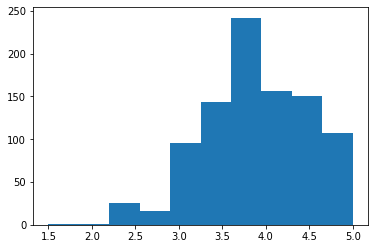

In [82]:
tabel_data['Rating'].hist(grid=False)

<AxesSubplot:>

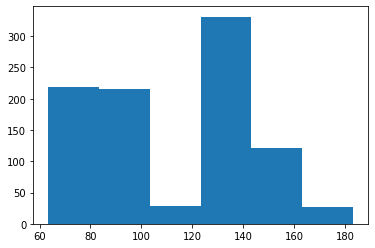

In [83]:
tabel_data['avg_salary'].hist(bins=6,grid=False)

<AxesSubplot:>

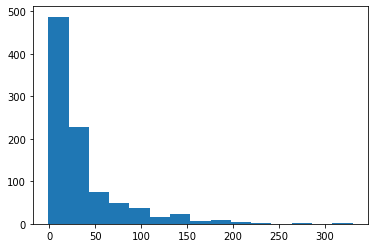

In [84]:
tabel_data.age.hist(bins=15,grid=False)

<AxesSubplot:>

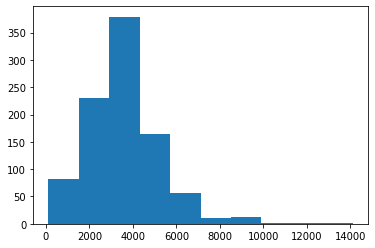

In [85]:
tabel_data['len_desc'].hist(grid=False)

<AxesSubplot:xlabel='len_desc', ylabel='age'>

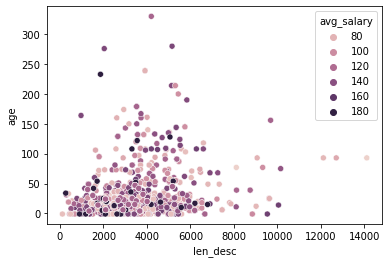

In [86]:
sns.scatterplot(x=tabel_data.len_desc,y=tabel_data.age,hue=tabel_data.avg_salary)

<AxesSubplot:>

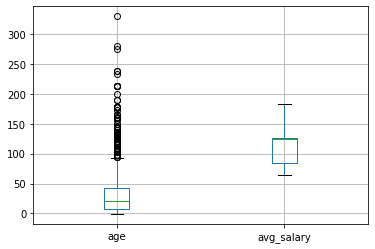

In [87]:
tabel_data.boxplot(column=['age','avg_salary'])

<AxesSubplot:>

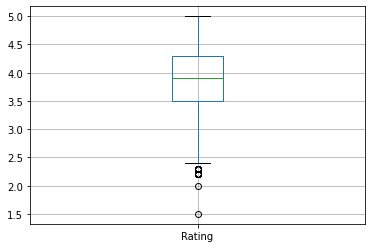

In [88]:
tabel_data.boxplot(column='Rating')

In [89]:
corr_1 = tabel_data[["age","avg_salary","Rating","len_desc","num_comp"]].corr()

corr_1

,age,avg_salary,Rating,len_desc,num_comp
age,1.000000,0.019714,-0.152492,0.181225,0.182292
avg_salary,0.019714,1.000000,0.050819,-0.073773,-0.023767
Rating,-0.152492,0.050819,1.000000,-0.103349,-0.084715
len_desc,0.181225,-0.073773,-0.103349,1.000000,0.144077
num_comp,0.182292,-0.023767,-0.084715,0.144077,1.000000


In [90]:
corr_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, age to num_comp
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         5 non-null      float64
 1   avg_salary  5 non-null      float64
 2   Rating      5 non-null      float64
 3   len_desc    5 non-null      float64
 4   num_comp    5 non-null      float64
dtypes: float64(5)
memory usage: 240.0+ bytes


C:\Users\IZZAN\AppData\Local\Temp\ipykernel_30348\3668814793.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_1, dtype=np.bool))


<AxesSubplot:>

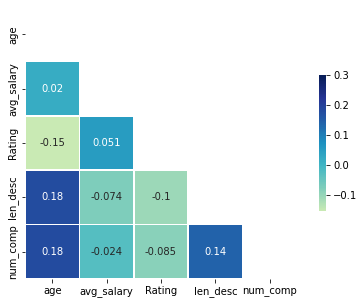

In [91]:
f, ax = plt.subplots(figsize=(8, 5))
mask = np.triu(np.ones_like(corr_1, dtype=np.bool))
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr_1,vmax=.3,center=0,cmap="YlGnBu",mask=mask,square=True,linewidths=.5,cbar_kws={"shrink": .5},annot=True)

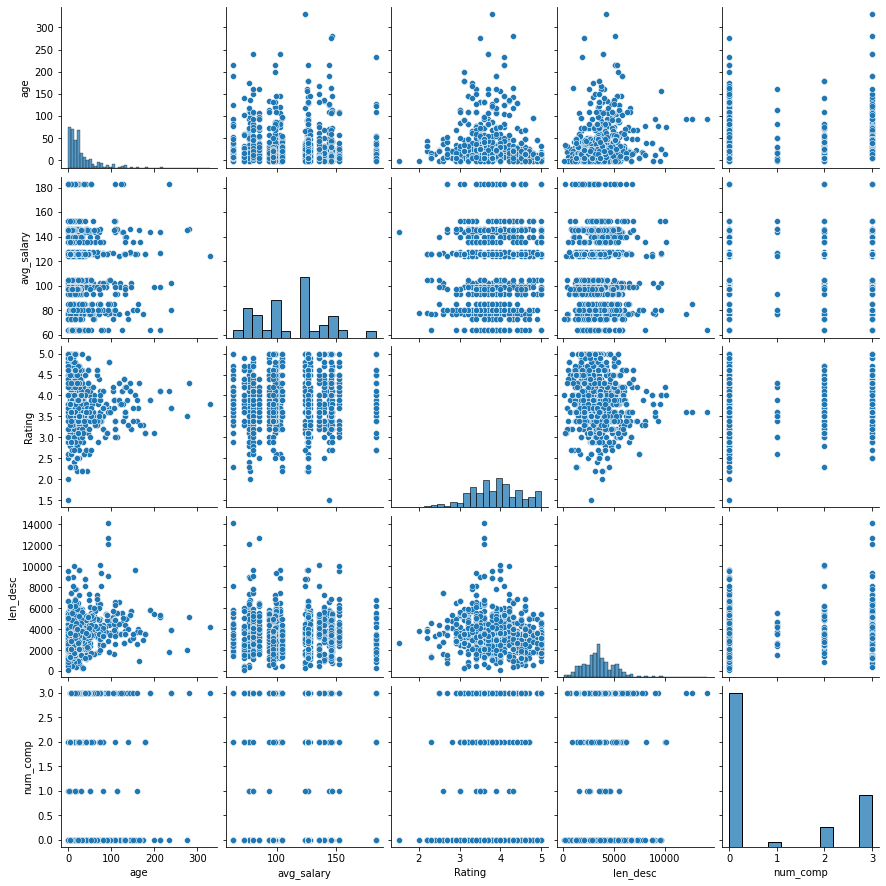

In [92]:
sns.pairplot(tabel_data[['age','avg_salary','Rating','len_desc','num_comp']])

In [93]:
tabel_data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'State', 'jobhq', 'age',
       'python_req', 'r_req', 'aws_req', 'spark_req', 'hadoop_req',
       'docker_req', 'sql_req', 'linux_req', 'flask_req', 'django_req',
       'tensorflow_req', 'keras_req', 'pytorch_req', 'algo_req', 'stats_req',
       'tableau_req', 'job_type', 'job_type_num', 'Seniority', 'seniority_num',
       'len_desc', 'num_comp'],
      dtype='object')

In [94]:
tabel_kategori = tabel_data[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue',
                             "Company Name",'State','python_req', 'r_req', 'aws_req', 'spark_req', 'hadoop_req',
                             'docker_req', 'sql_req', 'linux_req', 'flask_req', 'django_req',
                             'tensorflow_req', 'keras_req', 'pytorch_req', 'algo_req', 'stats_req',
                             'tableau_req', 'job_type','Seniority']]

grafik untuk Location: total = 243


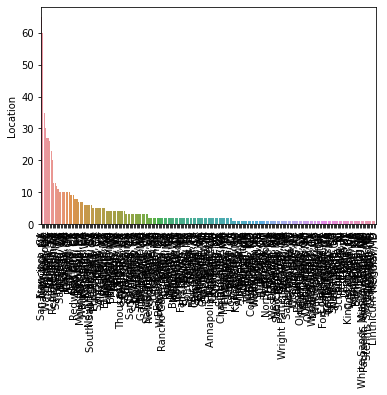

grafik untuk Headquarters: total = 266


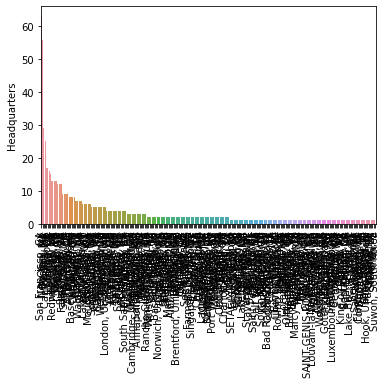

grafik untuk Size: total = 8


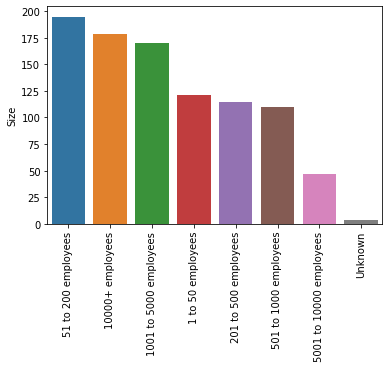

grafik untuk Type of ownership: total = 12


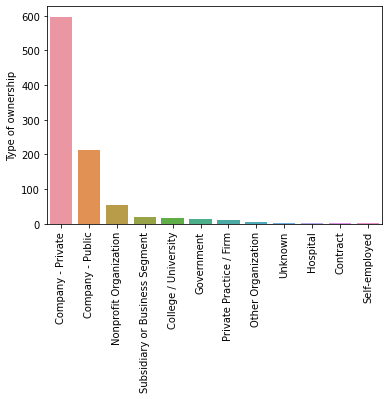

grafik untuk Industry: total = 62


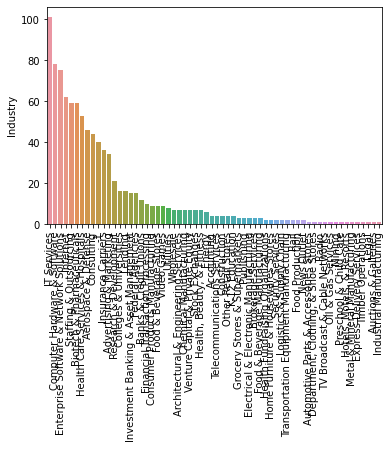

grafik untuk Sector: total = 23


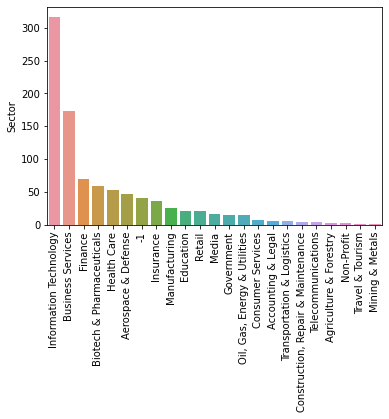

grafik untuk Revenue: total = 13


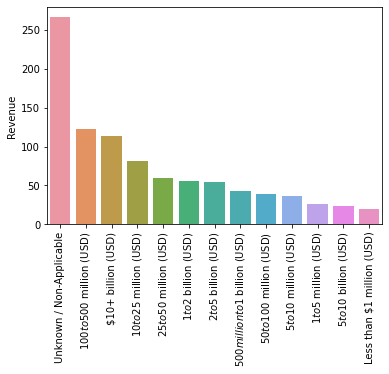

grafik untuk Company Name: total = 547


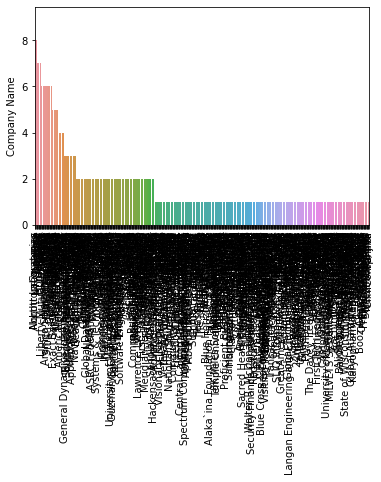

grafik untuk State: total = 41


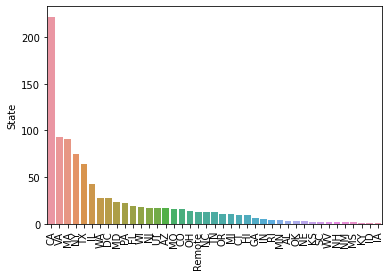

grafik untuk python_req: total = 2


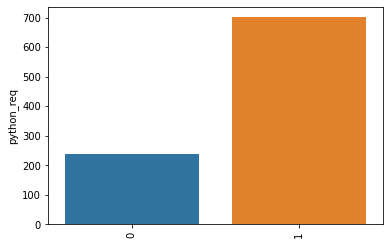

grafik untuk r_req: total = 2


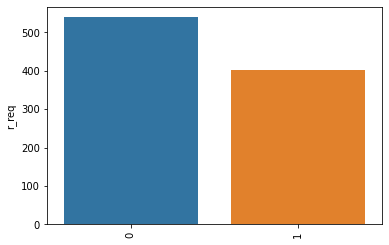

grafik untuk aws_req: total = 2


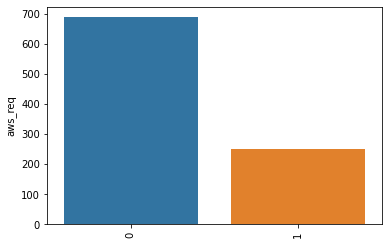

grafik untuk spark_req: total = 2


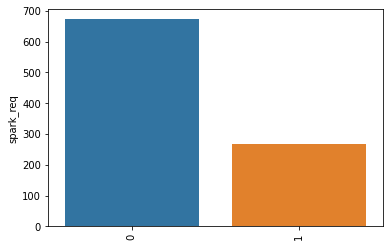

grafik untuk hadoop_req: total = 2


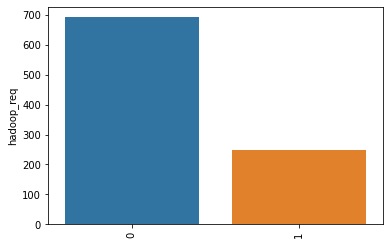

grafik untuk docker_req: total = 2


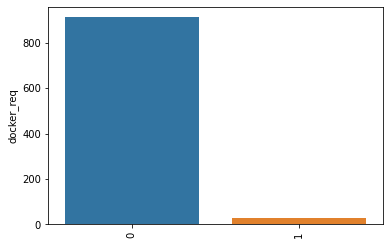

grafik untuk sql_req: total = 2


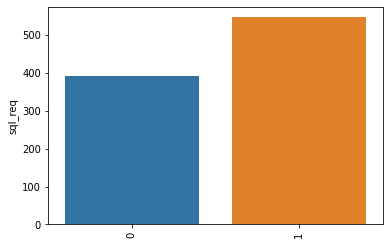

grafik untuk linux_req: total = 2


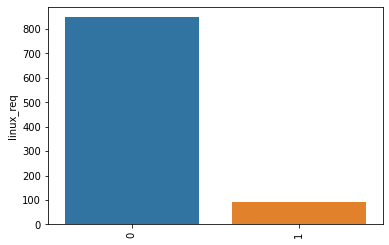

grafik untuk flask_req: total = 2


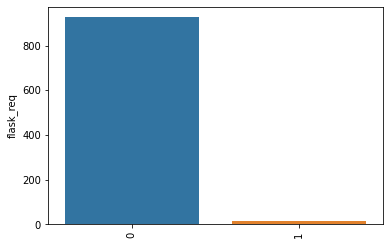

grafik untuk django_req: total = 2


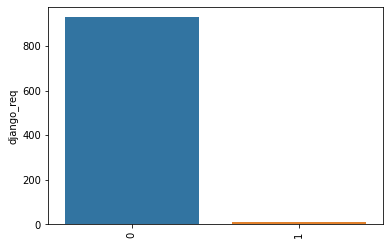

grafik untuk tensorflow_req: total = 2


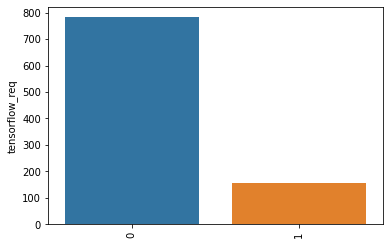

grafik untuk keras_req: total = 2


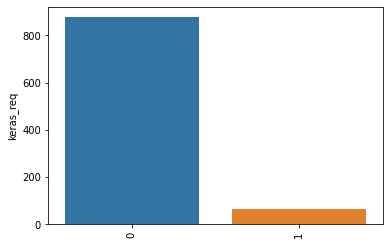

grafik untuk pytorch_req: total = 2


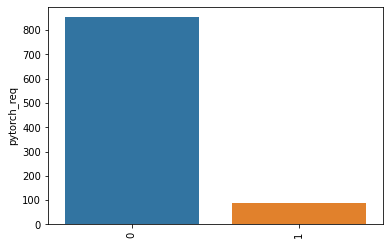

grafik untuk algo_req: total = 2


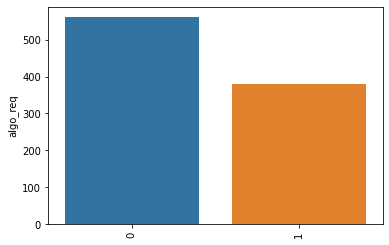

grafik untuk stats_req: total = 2


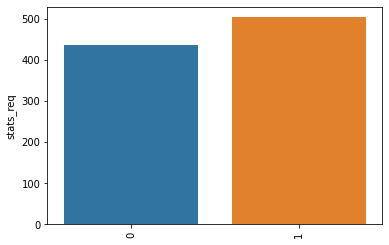

grafik untuk tableau_req: total = 2


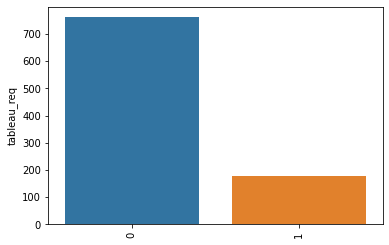

grafik untuk job_type: total = 9


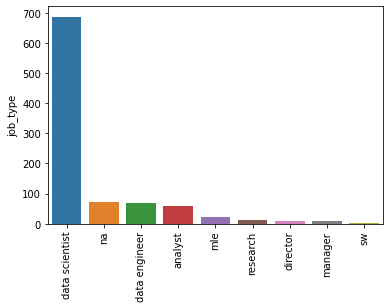

grafik untuk Seniority: total = 2


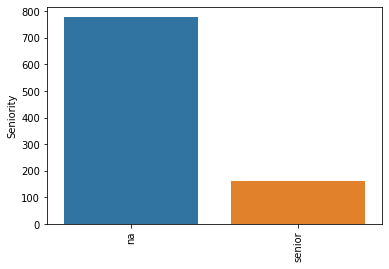

In [95]:
for i in tabel_kategori.columns:
    cat_num = tabel_kategori[i].value_counts()
    print("grafik untuk %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

grafik untuk Location: Top 20


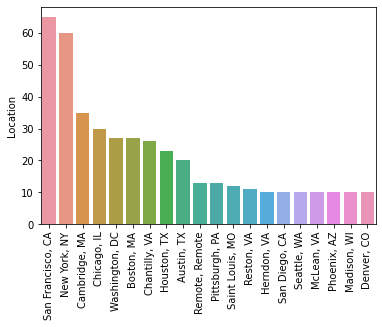

grafik untuk Headquarters: Top 20


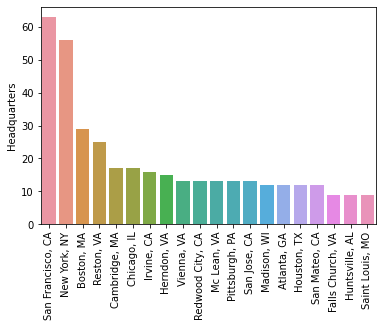

grafik untuk Industry: Top 20


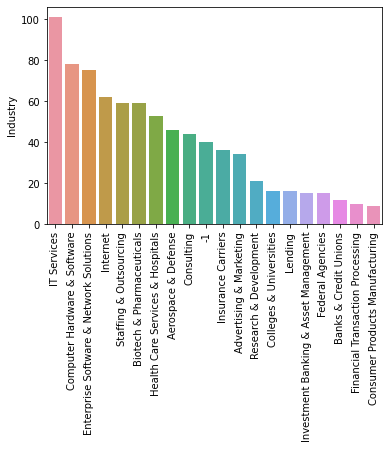

grafik untuk Company Name: Top 20


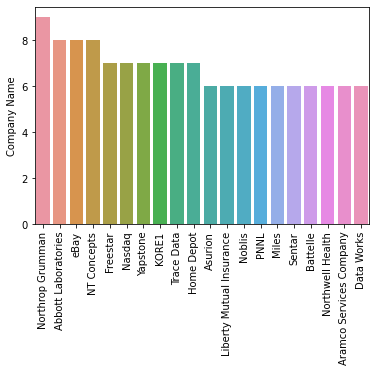

In [96]:
for i in tabel_data[["Location", "Headquarters", "Industry", "Company Name"]].columns:
    cat_num = tabel_kategori[i].value_counts()[:20]
    print("grafik untuk %s: Top %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [97]:
tabel_data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'State', 'jobhq', 'age',
       'python_req', 'r_req', 'aws_req', 'spark_req', 'hadoop_req',
       'docker_req', 'sql_req', 'linux_req', 'flask_req', 'django_req',
       'tensorflow_req', 'keras_req', 'pytorch_req', 'algo_req', 'stats_req',
       'tableau_req', 'job_type', 'job_type_num', 'Seniority', 'seniority_num',
       'len_desc', 'num_comp'],
      dtype='object')

In [98]:
pd.pivot_table(tabel_data, index="job_type", values="avg_salary", aggfunc=[np.min,np.max,np.mean,np.std])

,amin,amax,mean,std
,avg_salary,avg_salary,avg_salary,avg_salary
job_type,,,,
analyst,63.5,183.0,99.093220,28.392640
data engineer,63.5,152.5,101.119403,27.786809
data scientist,63.5,183.0,116.101164,27.231654
director,76.5,152.5,94.562500,28.812742
manager,76.5,99.0,83.187500,9.698813
mle,63.5,152.5,98.369565,27.180883
na,63.5,152.5,104.047945,25.143776
research,76.5,126.5,91.115385,17.978174


In [99]:
pd.pivot_table(tabel_data, index=['job_type','Seniority'],values='avg_salary')

avg_salary
job_type       Seniority            
analyst        na          93.869048
               senior     112.000000
data engineer  na         102.231481
               senior      96.500000
data scientist na         116.924115
               senior     110.909574
director       na          90.000000
               senior     126.500000
manager        na          80.928571
               senior      99.000000
mle            na          98.470588
               senior      98.083333
na             na         105.288889
               senior     102.053571
research       na          93.000000
               senior      80.750000
sw             na         126.000000

In [100]:
pd.pivot_table(tabel_data, index='State', values="avg_salary",margins=True,aggfunc=[np.mean,'count'])

,mean,count
,avg_salary,avg_salary
State,,
AL,107.666667,3
AZ,116.323529,17
CA,113.806306,222
CO,119.031250,16
CT,103.500000,9
DC,111.388889,27
FL,108.789474,19
GA,129.666667,6


In [101]:
pd.pivot_table(tabel_data,index='State',values='avg_salary',margins=True, aggfunc=[np.mean,'count'])

,mean,count
,avg_salary,avg_salary
State,,
AL,107.666667,3
AZ,116.323529,17
CA,113.806306,222
CO,119.031250,16
CT,103.500000,9
DC,111.388889,27
FL,108.789474,19
GA,129.666667,6


In [102]:
tabel_data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'State', 'jobhq', 'age',
       'python_req', 'r_req', 'aws_req', 'spark_req', 'hadoop_req',
       'docker_req', 'sql_req', 'linux_req', 'flask_req', 'django_req',
       'tensorflow_req', 'keras_req', 'pytorch_req', 'algo_req', 'stats_req',
       'tableau_req', 'job_type', 'job_type_num', 'Seniority', 'seniority_num',
       'len_desc', 'num_comp'],
      dtype='object')

In [103]:
tabel_data_piv = tabel_data[['Rating','Industry', 'Sector', 'Revenue', 'num_comp','Type of ownership',
                  'python_req','r_req','aws_req','spark_req','hadoop_req','docker_req','sql_req',
                  'linux_req','flask_req','django_req','tensorflow_req','keras_req','pytorch_req',
                  'algo_req','stats_req','tableau_req','avg_salary']]

In [104]:
try:
    for i in tabel_data_piv.columns:
        print(i)
        print(pd.pivot_table(tabel_data_piv,index=i,values='avg_salary').sort_values('avg_salary',
                                                                                    ascending=False))
except ValueError:
    pass

Rating
        avg_salary
Rating            
1.5     143.500000
2.7     136.714286
4.3     124.488095
4.8     123.470588
3.0     122.117647
5.0     121.770833
4.5     118.010870
2.5     117.500000
2.2     117.187500
4.0     115.525424
4.9     115.444444
3.1     115.234375
3.2     115.086207
3.3     114.250000
4.6     113.152778
3.8     109.932836
2.3     109.312500
3.6     109.000000
3.7     108.966667
4.7     108.687500
2.9     108.611111
4.1     108.570000
3.4     107.609091
3.5     107.008197
4.2     104.638298
4.4     104.129630
3.9     103.008065
2.6      97.916667
2.8      94.666667
2.0      77.500000
2.4      77.000000
Industry
                                     avg_salary
Industry                                       
Department, Clothing, & Shoe Stores      183.00
Hotels, Motels, & Resorts                145.50
Auctions & Galleries                     145.50
Health Fundraising Organizations         142.75
Accounting                               136.25
...                  

In [105]:
tabel_data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'State', 'jobhq', 'age',
       'python_req', 'r_req', 'aws_req', 'spark_req', 'hadoop_req',
       'docker_req', 'sql_req', 'linux_req', 'flask_req', 'django_req',
       'tensorflow_req', 'keras_req', 'pytorch_req', 'algo_req', 'stats_req',
       'tableau_req', 'job_type', 'job_type_num', 'Seniority', 'seniority_num',
       'len_desc', 'num_comp'],
      dtype='object')

In [106]:
type(tabel_data.jobhq[0])

numpy.int64

In [107]:
tabel_data.Seniority.value_counts()

na        778
senior    162
Name: Seniority, dtype: int64

In [108]:
tabel_data.len_desc.describe()

count      940.000000
mean      3624.280851
std       1674.938897
min        119.000000
25%       2627.000000
50%       3508.000000
75%       4424.500000
max      14110.000000
Name: len_desc, dtype: float64

In [109]:
tabel_data['python_req'].value_counts()

1    701
0    239
Name: python_req, dtype: int64

# Pembuatan Model

In [110]:
tabel_data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'State', 'jobhq', 'age',
       'python_req', 'r_req', 'aws_req', 'spark_req', 'hadoop_req',
       'docker_req', 'sql_req', 'linux_req', 'flask_req', 'django_req',
       'tensorflow_req', 'keras_req', 'pytorch_req', 'algo_req', 'stats_req',
       'tableau_req', 'job_type', 'job_type_num', 'Seniority', 'seniority_num',
       'len_desc', 'num_comp'],
      dtype='object')

In [111]:
tabel_model = tabel_data[["avg_salary","Rating","jobhq","age","num_comp","python_req",
                         "r_req","aws_req","spark_req","hadoop_req","docker_req","sql_req",
                         "linux_req","flask_req","django_req","tensorflow_req","keras_req",
                         "pytorch_req","tableau_req","algo_req","stats_req","len_desc",
                         "job_type_num","seniority_num"]]

In [112]:
tabel_model.head()

,avg_salary,Rating,jobhq,age,num_comp,python_req,r_req,aws_req,spark_req,hadoop_req,...,django_req,tensorflow_req,keras_req,pytorch_req,tableau_req,algo_req,stats_req,len_desc,job_type_num,seniority_num
0,85.0,4.2,0,52,0,0,0,0,0,1,...,0,0,0,0,0,1,1,3962,3,2
1,85.0,3.2,1,28,0,1,1,0,0,0,...,0,0,0,0,1,0,0,5358,3,2
2,85.0,2.9,1,5,0,1,1,0,0,0,...,0,0,0,0,0,0,0,3183,7,2
3,85.0,4.2,0,32,3,0,0,0,0,0,...,0,0,0,0,0,0,0,4218,1,2
4,85.0,3.8,0,16,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1833,7,2


## Data dummy

In [113]:
tabel_dum = pd.get_dummies(tabel_model)

In [114]:
tabel_model['seniority_num'] = tabel_model.seniority_num.astype('int64')

In [115]:
tabel_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   avg_salary      940 non-null    float64
 1   Rating          940 non-null    float64
 2   jobhq           940 non-null    int64  
 3   age             940 non-null    int64  
 4   num_comp        940 non-null    int64  
 5   python_req      940 non-null    int64  
 6   r_req           940 non-null    int64  
 7   aws_req         940 non-null    int64  
 8   spark_req       940 non-null    int64  
 9   hadoop_req      940 non-null    int64  
 10  docker_req      940 non-null    int64  
 11  sql_req         940 non-null    int64  
 12  linux_req       940 non-null    int64  
 13  flask_req       940 non-null    int64  
 14  django_req      940 non-null    int64  
 15  tensorflow_req  940 non-null    int64  
 16  keras_req       940 non-null    int64  
 17  pytorch_req     940 non-null    int

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X = tabel_model.drop("avg_salary",axis=1)
y = tabel_model.avg_salary.values

In [118]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

In [119]:
X_test.head()

,Rating,jobhq,age,num_comp,python_req,r_req,aws_req,spark_req,hadoop_req,docker_req,...,django_req,tensorflow_req,keras_req,pytorch_req,tableau_req,algo_req,stats_req,len_desc,job_type_num,seniority_num
673,4.9,0,-1,0,1,1,0,0,0,0,...,0,0,0,0,0,1,1,5003,3,2
774,4.2,0,17,0,1,0,0,1,1,0,...,0,0,0,0,0,1,1,1446,3,2
3,4.2,0,32,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4218,1,2
961,3.6,0,132,0,1,0,0,1,1,0,...,0,0,0,0,0,1,1,3575,3,2
107,4.0,1,60,3,1,0,1,0,0,1,...,0,0,0,0,0,1,0,5242,2,2


In [120]:
X_test.columns

Index(['Rating', 'jobhq', 'age', 'num_comp', 'python_req', 'r_req', 'aws_req',
       'spark_req', 'hadoop_req', 'docker_req', 'sql_req', 'linux_req',
       'flask_req', 'django_req', 'tensorflow_req', 'keras_req', 'pytorch_req',
       'tableau_req', 'algo_req', 'stats_req', 'len_desc', 'job_type_num',
       'seniority_num'],
      dtype='object')

## Multiple Linear Regression

In [123]:
import statsmodels.api as sm

In [124]:
X_sm = X = sm.add_constant(X)

In [125]:
model = sm.OLS(y,X_sm)

In [126]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     2.084
Date:                Sun, 21 Aug 2022   Prob (F-statistic):            0.00208
Time:                        22:50:47   Log-Likelihood:                -4438.8
No. Observations:                 940   AIC:                             8926.
Df Residuals:                     916   BIC:                             9042.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             98.1064      8.642     11.352      0.000      81.146     115.067
Rating             2.5835      1.511      1.710      0.088      -0.381       5.548
jobhq             -0.0959      1.893     -0.051      0.960      -3.812       3.620
age                0.0302      0.022      1.368      0.172      -0.013       0.074
num_comp          -0.1772      0.738     -0.240      0.810      -1.626       1.271
python_req         5.9503      2.475      2.404      0.016       1.093      10.807
r_req             -2.3414      2.051     -1.142      0.254      -6.366       1.683
aws_req           -3.9877      2.314     -1.724      0.085      -8.528       0.553
spark_req         -0.3088      2.818     -0.110      0.913      -5.839       5.221
hadoop_req        -1.0275      2.799     -0.367      0.714      -6.520       4.465
docker_req        -0.4281      5.620     -0.076      0.939     -11.458      10.602
sql_req            2.8313      2.123      1.334      0.183      -1.335       6.998
linux_req          3.7273      3.270      1.140      0.255      -2.690      10.144
flask_req          9.0127      9.308      0.968      0.333      -9.254      27.279
django_req         8.1870     10.343      0.792      0.429     -12.112      28.486
tensorflow_req    -5.4505      3.723     -1.464      0.144     -12.757       1.856
keras_req          2.4639      4.536      0.543      0.587      -6.438      11.366
pytorch_req        5.8987      4.229      1.395      0.163      -2.401      14.199
tableau_req       -2.3300      2.479     -0.940      0.347      -7.194       2.534
algo_req           4.1256      2.031      2.032      0.042       0.140       8.111
stats_req          2.3003      1.953      1.178      0.239      -1.533       6.134
len_desc          -0.0013      0.001     -2.082      0.038      -0.002    -7.2e-05
job_type_num      -0.8980      0.650     -1.382      0.167      -2.174       0.378
seniority_num      2.1127      2.518      0.839      0.402      -2.828       7.054
==============================================================================
Omnibus:                       18.886   Durbin-Watson:                   0.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.033
Skew:                           0.251   Prob(JB):                     0.000330
Kurtosis:                       2.602   Cond. No.                     5.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [128]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [129]:
np.mean(cross_val_score(lm,X_train,y_train,scoring="neg_mean_absolute_error",cv=3))

-24.035127459104164

## Lasso Regression

In [130]:
lasso_reg = Lasso(alpha=.19)

In [131]:
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.19)

In [132]:
np.mean(cross_val_score(lasso_reg,X_train,y_train,scoring="neg_mean_absolute_error",cv=3))

-24.06258017618883

In [133]:
alpha = []
error = []

In [134]:
for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train,scoring="neg_mean_absolute_error",cv=3)))

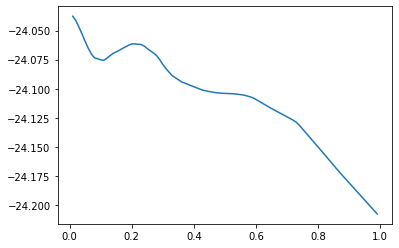

In [135]:
plt.plot(alpha,error)

In [136]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err,columns=["alpha","error"])
df_err[df_err.error == max(df_err.error)]

,alpha,error
0,0.01,-24.037688


## Random Forest

In [137]:
from sklearn.ensemble import RandomForestRegressor

In [138]:
rf = RandomForestRegressor()

In [139]:
rf1 = rf.fit(X_train,y_train)

In [140]:
np.mean(cross_val_score(rf1,X_train,y_train,scoring="neg_mean_absolute_error",cv=3))

-22.970603557992103

## Tune Models GridSearchCV

In [141]:
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

In [142]:
X_train = preprocessing.scale(X_train)

In [143]:
parameters = {"n_estimators":range(10,200,10),"criterion":("mse","mae"),"max_features":("auto","sqrt","log2")}

In [144]:
gs = GridSearchCV(rf,parameters,scoring="neg_mean_absolute_error",cv=3,n_jobs=-1)

In [145]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 200, 10)},
             scoring='neg_mean_absolute_error')

In [146]:
gs.best_score_

-22.45569018285831

In [147]:
gs.best_estimator_

RandomForestRegressor(criterion='mae', max_features='sqrt', n_estimators=130)

## Test Ensembles

In [148]:
tpred_lm = lm.predict(X_test)

In [149]:
tpred_lml = lasso_reg.predict(X_test)

In [150]:
tpred_rfgs = gs.best_estimator_.predict(X_test)

In [151]:
tpred_rf = rf1.predict(X_test)

In [152]:
from sklearn.metrics import mean_absolute_error

In [153]:
mean_absolute_error(y_test,tpred_lm)

23.543037845026404

In [154]:
mean_absolute_error(y_test,tpred_lml)

23.79766804364395

In [155]:
mean_absolute_error(y_test,tpred_rf)

22.786238302477663

In [156]:
mean_absolute_error(y_test,tpred_rfgs)

24.17127659574468

## Pickling (menggunakan JobLib)

In [157]:
import joblib

In [158]:
joblib.dump(rf1,'model.pkl')

['model.pkl']

In [159]:
model = joblib.load('model.pkl')

In [160]:
model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

112.4745

In [161]:
np.array(list(X_test.iloc[1,:]))

array([4.200e+00, 0.000e+00, 1.700e+01, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 1.000e+00, 1.446e+03, 3.000e+00, 2.000e+00])

In [162]:
type(np.array(list(X_test.iloc[1,:])))

numpy.ndarray